<a href="https://colab.research.google.com/github/Maticus-7/Mental-Healthy/blob/main/Depression/University/Depresi%C3%B3n_Estudiantil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CARGAR Y ELEGIR LOS DATOS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix ,classification_report
from sklearn.preprocessing import StandardScaler

# Cargar los datos
df = pd.read_csv("Depression Student Dataset.csv")

# Mapeo de valores para Sleep Duration
df['Sleep Duration'] = df['Sleep Duration'].replace({
    '7-8 hours': 8,
    '5-6 hours': 6,
    'More than 8 hours': 9,
    'Less than 5 hours': 4,
})

# Convertir respuestas binarias a 0 y 1
df.replace({'Yes': 1, 'No': 0}, inplace=True)

# Convertir variables categóricas a numéricas
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Dietary Habits'] = df['Dietary Habits'].map({'Healthy': 0, 'Moderate': 1, 'Unhealthy': 2})


df.head()
# Definir variables predictoras y objetivo
X = df.drop(columns=['Depression', 'Gender', 'Age'])
y = df['Depression']

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled)

# Dividir datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)





[[-0.72300747  0.67363065  0.63353727 ...  0.69425592 -0.65205508
   1.05742303]
 [ 0.71726932  1.40242933 -0.40920276 ...  0.15931122 -1.35448351
   1.05742303]
 [-1.44314587 -0.05516803 -0.40920276 ...  0.96172827  0.75280178
  -0.94569531]
 ...
 [-0.00286908  1.40242933 -0.40920276 ... -1.44552288  1.45523021
   1.05742303]
 [ 0.71726932  0.67363065  1.15490728 ...  0.42678357 -1.35448351
   1.05742303]
 [ 1.43740772 -0.05516803  1.15490728 ... -0.10816113 -0.65205508
   1.05742303]]


<ipython-input-6-2111afae2c02>:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sleep Duration'] = df['Sleep Duration'].replace({
<ipython-input-6-2111afae2c02>:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Yes': 1, 'No': 0}, inplace=True)


# ARBOLES DE ELECCION

Precisión del modelo: 0.8416
              precision    recall  f1-score   support

           0       0.92      0.73      0.81        48
           1       0.79      0.94      0.86        53

    accuracy                           0.84       101
   macro avg       0.86      0.84      0.84       101
weighted avg       0.85      0.84      0.84       101



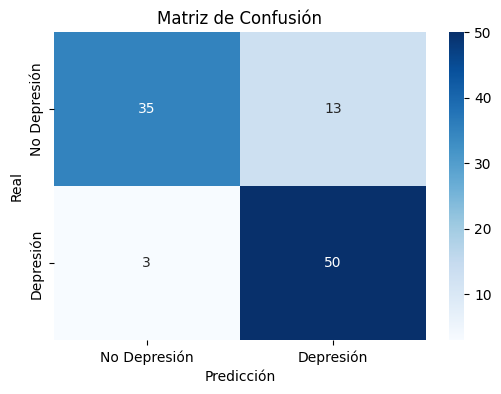

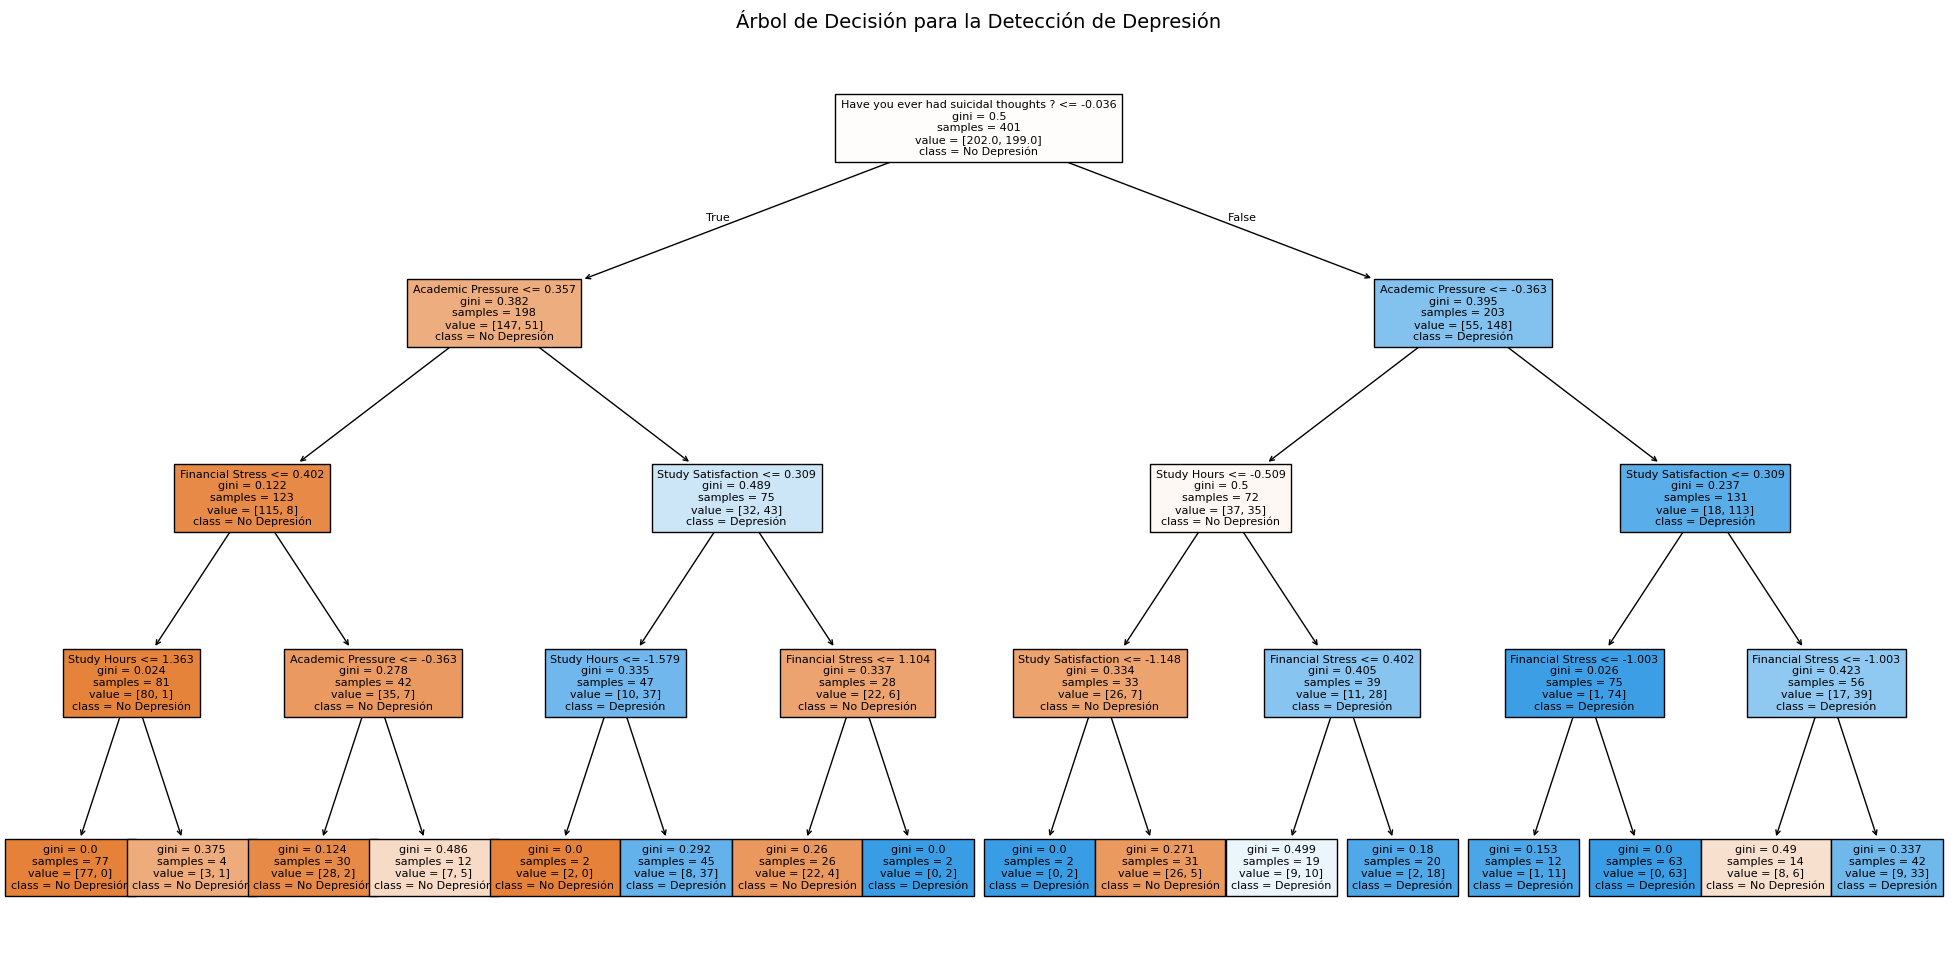

In [ ]:
# Inicializar y entrenar el modelo con hiperparámetros optimizados
modelo = DecisionTreeClassifier(max_depth=4, min_samples_split=10, random_state=42)
modelo.fit(X_train, y_train)

# Predicciones
y_pred = modelo.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Precisión del modelo: {accuracy:.4f}")
print ( classification_report ( y_test , y_pred ) )

# Graficar Matriz de Confusión
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Depresión", "Depresión"], yticklabels=["No Depresión", "Depresión"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")p
plt.show()


# Graficar Árbol de Decisión
plt.figure(figsize=(25,12))
plot_tree(modelo, feature_names=X.columns, class_names=["No Depresión", "Depresión"], filled=True, fontsize=8)
plt.title("Árbol de Decisión para la Detección de Depresión", fontsize=14)
plt.show()


#RANDOM FOREST

Precisión del modelo: 0.8911


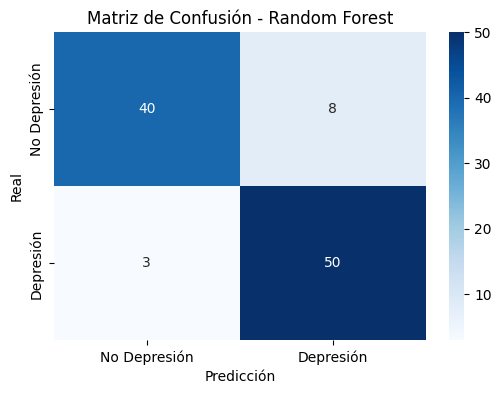

              precision    recall  f1-score   support

           0       0.92      0.73      0.81        48
           1       0.79      0.94      0.86        53

    accuracy                           0.84       101
   macro avg       0.86      0.84      0.84       101
weighted avg       0.85      0.84      0.84       101



In [ ]:
# Importar librerías necesarias
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

# Inicializar y entrenar el modelo Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Predicciones con el modelo Random Forest
y_pred_rf = random_forest.predict(X_test)

# Evaluación del modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

accuracy_rf, conf_matrix_rf

print(f"Precisión del modelo: {accuracy_rf:.4f}")

# Graficar la matriz de confusión de Random Forest
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Depresión", "Depresión"],
            yticklabels=["No Depresión", "Depresión"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Random Forest")
plt.show()
# Reporte de C l a s i f i c a c i n
print ( classification_report ( y_test , y_pred ) )